In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = sns.get_dataset_names()
df

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [ ]:
df= sns.load_dataset('taxis')
df

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [ ]:
num_cols = df.select_dtypes('number').columns.tolist()
print(num_cols)

['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']


In [ ]:
cat_cols = df.select_dtypes('object').columns
print(cat_cols)

Index(['color', 'payment', 'pickup_zone', 'dropoff_zone', 'pickup_borough',
       'dropoff_borough'],
      dtype='object')


In [ ]:
from sklearn.impute import SimpleImputer
one = SimpleImputer()
cal_imp = SimpleImputer(strategy = 'most_frequent')

In [ ]:
df[num_cols] = one.fit_transform(df[num_cols])
df.isnull().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [ ]:
pay = LabelEncoder()
df[['payment']] = cal_imp.fit_transform(df[['payment']])
pay = LabelEncoder()
df[['pickup_zone']] = cal_imp.fit_transform(df[['pickup_zone']])
pay = LabelEncoder()
df[['dropoff_zone']] = cal_imp.fit_transform(df[['dropoff_zone']])
pay = LabelEncoder()
df[['pickup_borough']] = cal_imp.fit_transform(df[['pickup_borough']])
pay = LabelEncoder()
df[['dropoff_borough']] = cal_imp.fit_transform(df[['dropoff_borough']])
df.head()
df.isnull().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat = ['payment', 'color']
ohe = OneHotEncoder(drop = 'first')
encode = ohe.fit_transform(df[cat]).toarray()
encode_df = pd.DataFrame(encode , columns=ohe.get_feature_names_out(cat))
encode_df


,payment_credit card,color_yellow
0,1.0,1.0
1,0.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
6428,1.0,0.0
6429,1.0,0.0
6430,0.0,0.0
6431,1.0,0.0


<Axes: xlabel='distance', ylabel='fare'>

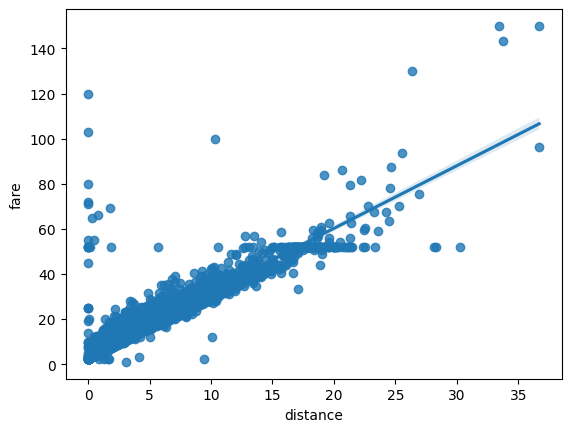

In [ ]:
sns.regplot(x='distance', y = 'fare', data=df)

<Axes: xlabel='passengers', ylabel='fare'>

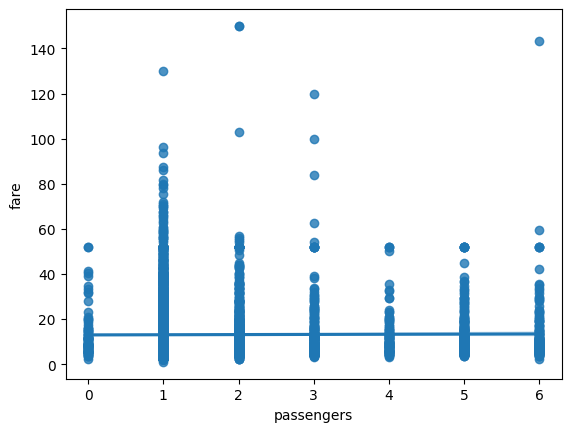

In [ ]:
sns.regplot(x='passengers', y = 'fare', data=df)

In [ ]:
a=cat=cat_cols

In [4]:
clean_df = pd.concat([df,encode_df], axis = 1).drop(a, axis = 1)
clean_df

NameError: name 'pd' is not defined

In [3]:
# Data Scaling
number_cols = df.select_dtypes(include =['int64', 'float64']).columns
scaler = StandardScaler()
clean_df[number_cols] = scaler.fit_transform(df[number_cols])
clean_df

NameError: name 'df' is not defined

In [2]:
X = clean_df.drop(columns=['fare'])   # features
y = clean_df['fare']                  # target

NameError: name 'clean_df' is not defined

In [1]:
# train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'X' is not defined

reg = LinearRegression()
reg.fit(X_train, y_train)